### Linear Regression


In [2]:
import pandas as pd
import numpy as np
import  seaborn as sns

In [ ]:
# 1.data loading and data collection
df=sns.load_dataset("tips")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
# 2.understanding the dataset
df.info  

<bound method DataFrame.info of      total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]>

In [ ]:
#3.stats summery
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


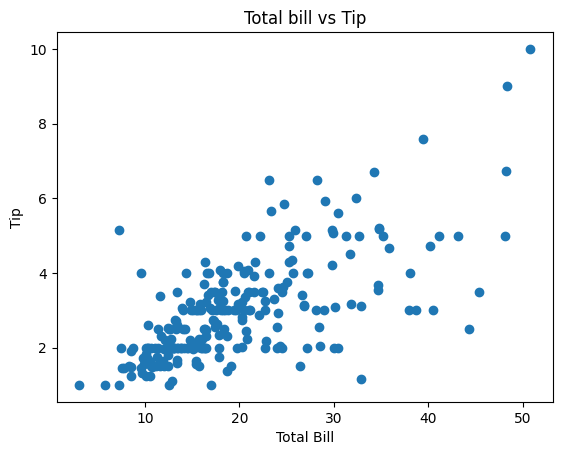

In [ ]:
#4.relationship check
#before using any model , we must confirm relationship..

import matplotlib.pyplot as plt
plt.scatter(df["total_bill"],df["tip"])
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.title("Total bill vs Tip")
plt.show()

'''observations
1. As the bill increases , tip increases
2.relationship is a straight  line, so we can apply linear regression'''

In [ ]:
# Feature & Target Seperation
x=df[["total_bill"]] # Feature i/p  in 2D only--> input must be in 2D only
y=df["tip"] # Feature o/p in 1D

In [ ]:
#5. Train-Test Split
'''A model must perform well on unseen data'''

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(
    x,y,
    test_size=0.2,
    random_state=42
)

'''obs:
80%-->Training
20%-->Testing'''

In [ ]:
#6.Feature Standardization
'''why..?---->to be on the same scale
1. compare the co-efficients fairly
2. avoid the dominance of large values
3. prepare for Ridge/Lasso '''

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

'''IMP: 
1.Fit only on training data
2. prevents the data leakage'''

#''' on training part--> we perform fit_transform'''

'IMP: \n1.Fit only on training data\n2. prevents the data leakage'

In [17]:
#7. Train linear regression model

from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train_scaled,y_train)

print("Co-efficient(m):",model.coef_[0])
print("Intercept(c):",model.intercept_)

y_pred=model.predict(x_test_scaled)

Co-efficient(m): 0.9357171400271826
Intercept(c): 3.0877948717948724


In [18]:
#8. Model Evaluation

from sklearn.metrics import r2_score
r2=r2_score(y_test,y_pred)
print("R2 Score:",r2)

R2 Score: 0.5449381659234664


In [20]:
from sklearn.metrics import mean_squared_error
import numpy as np

mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)

print("MSE:",mse)
print("RMSE:",rmse)

MSE: 0.5688142529229538
RMSE: 0.7541977545199626


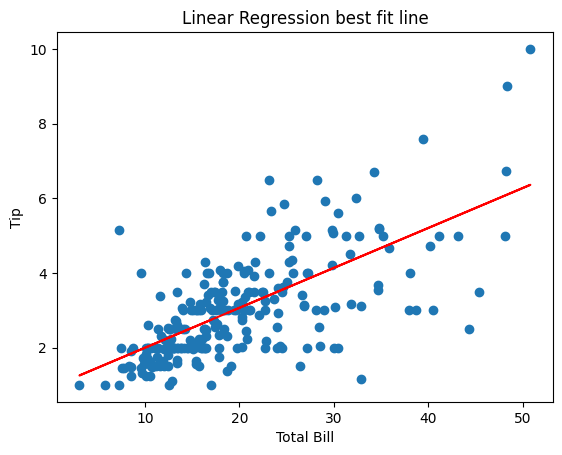

In [22]:
#9.Visualize the Best fit line

plt.scatter(x,y)
plt.plot(x,model.predict(scaler.transform(x)),color="red")
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.title("Linear Regression best fit line")
plt.show()

In [25]:
#10. Input- output Real time

bill_amount=float(input("Enter the bill amount:"))
bill_scaled=scaler.transform([[bill_amount]])
predict_tip=model.predict(bill_scaled)

print(f"Predicted Tip: {predict_tip[0]: .2f}")

Predicted Tip:  535.74


C:\Users\ushas\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
